In [60]:
import pandas as pd
import numpy as np
import arviz as az

In [61]:
df_ethiopia = pd.read_excel(r'alldatasets.xlsx',sheet_name='Ethiopia')

In [62]:
df_ethiopia.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,timeschool,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn,earn_usd
0,ET011003,Ethiopia,157.0,0.0,16.5,1.379536,15.0,9.0,12.0,0,99,7,0.524603,5,1,2000.0,92.032104
1,ET011004,Ethiopia,174.0,NaN,10.0,-0.092591,30.0,10.0,6.0,1,90,8,0.473611,3,1,32000.0,1472.513672
2,ET011009,Ethiopia,155.0,0.0,12.5,1.785974,30.0,14.0,8.0,0,90,13,0.562821,5,1,7000.0,322.112366
3,ET011010,Ethiopia,153.5,0.0,12.0,1.803539,30.0,NaN,NaN,0,91,3,0.320370,5,1,3600.0,165.657791
4,ET011014,Ethiopia,169.0,0.0,10.0,0.893750,45.0,3.0,0.0,1,99,6,0.409259,3,1,43200.0,1987.893433


In [63]:
df_ethiopia.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'timeschool', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1',
       'hhsizer1', 'wi_newr1', 'job_cat', 'pvt_sector', 'earn', 'earn_usd'],
      dtype='object')

In [64]:
from scipy import stats
import scipy.stats as stats

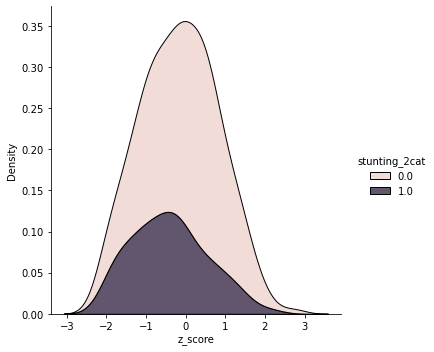

In [65]:
import seaborn as sns
sns.displot(df_ethiopia, x="z_score", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [66]:
Y = df_ethiopia[['z_score']]
X = df_ethiopia[['stunting_2cat']]

In [67]:
formula = 'z_score ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'z_score ~ stunting_2cat'

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=0, sigma=10.),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=1)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_ethiopia, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=3000, chains = 2, tune = 4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 4_000 tune and 3_000 draw iterations (8_000 + 6_000 draws total) took 33 seconds.


In [70]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.052,0.051,-0.148,0.045,0.001,0.001,3809.0,3295.0,3804.0,3424.0,1.0
stunting_2cat,-0.357,0.089,-0.524,-0.194,0.002,0.001,3245.0,3245.0,3258.0,3879.0,1.0
sd,0.962,0.028,0.909,1.015,0.000,0.000,7201.0,7201.0,7176.0,4435.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

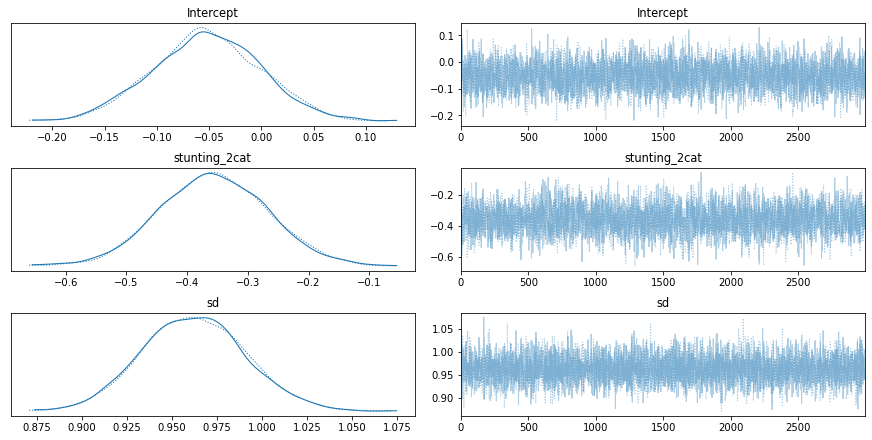

In [71]:
az.plot_trace(normal_trace)

In [72]:
Y = df_ethiopia['z_score']
X = df_ethiopia[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [73]:
formula = 'z_score ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'z_score ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=0, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=1),
        'agegapr1': pm.Normal.dist(mu=1, sigma=1),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=1),
        'chsexr1': pm.Normal.dist(mu=1, sigma=1),
        'agemonr1': pm.Normal.dist(mu=1, sigma=1),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=1),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=1)  
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_ethiopia, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 55 seconds.


In [76]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,0.727,1.106,-1.329,2.817,0.028,0.021,1597.0,1413.0,1604.0,1983.0,1.0
stunting_2cat,-0.238,0.090,-0.395,-0.061,0.002,0.001,2838.0,2511.0,2864.0,2715.0,1.0
agegapr1,0.008,0.006,-0.005,0.019,0.000,0.000,3534.0,3201.0,3555.0,2700.0,1.0
momeduyrsr1,0.017,0.016,-0.013,0.047,0.000,0.000,3102.0,2827.0,3103.0,2884.0,1.0
chsexr1,0.238,0.082,0.083,0.385,0.001,0.001,3507.0,3260.0,3508.0,2771.0,1.0
agemonr1,-0.015,0.012,-0.037,0.007,0.000,0.000,1597.0,1388.0,1601.0,1977.0,1.0
wi_newr1,2.208,0.260,1.717,2.684,0.005,0.003,3194.0,3194.0,3216.0,2976.0,1.0
hhsizer1,-0.022,0.023,-0.064,0.021,0.000,0.000,3055.0,2628.0,3059.0,2578.0,1.0
sd,0.838,0.029,0.784,0.890,0.000,0.000,3897.0,3897.0,3854.0,2654.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

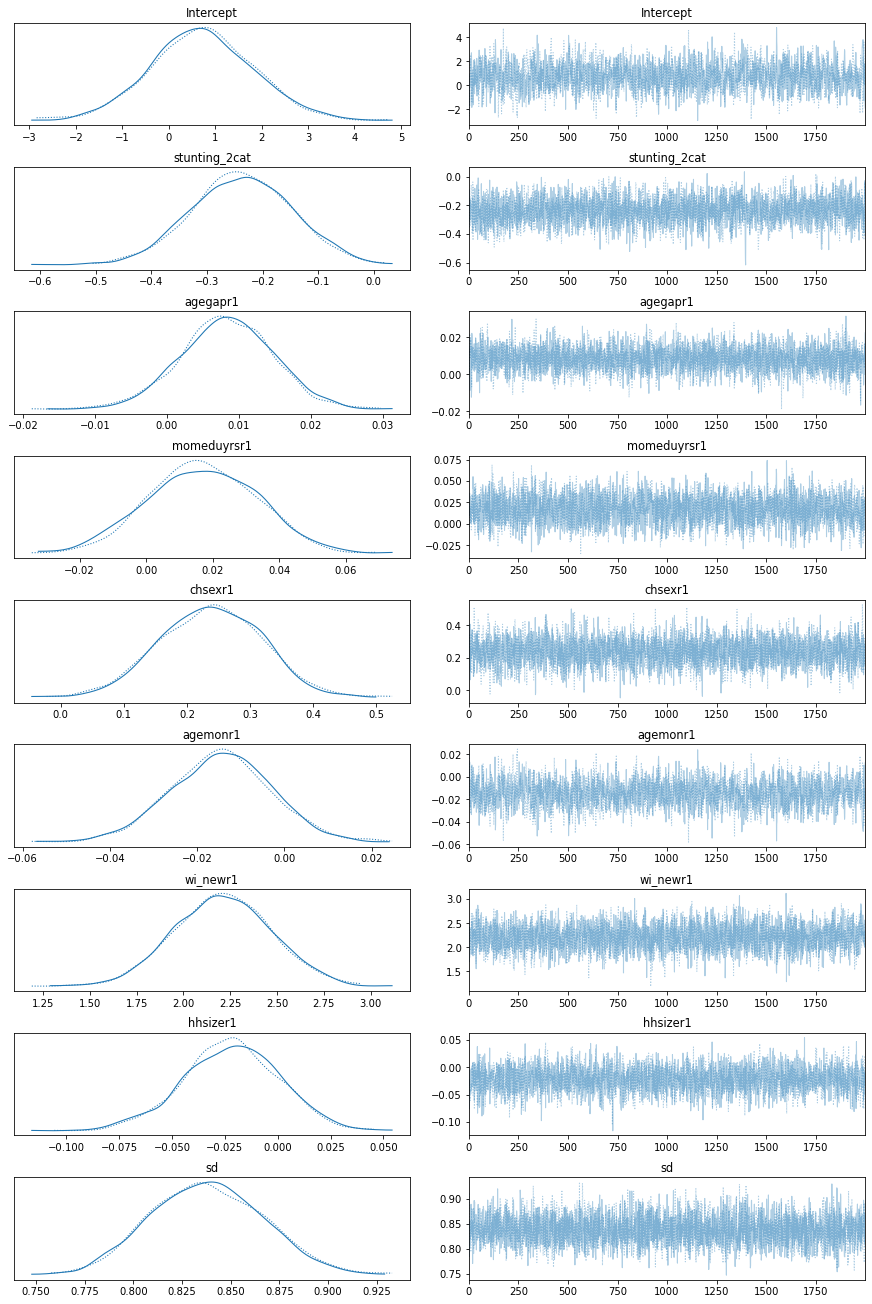

In [77]:
az.plot_trace(normal_trace)

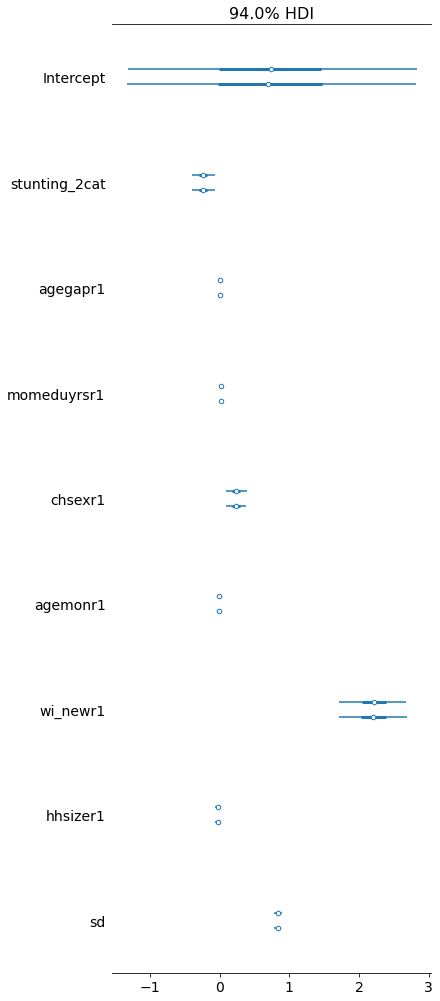

In [78]:
az.plot_forest(normal_trace);